In [1]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd sampletopworst5/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/sampletopworst5


In [4]:
Qj=pkl.load(open("Qj.pkl",'r'))
worker_obj_tbl = Qj
Athres_lst = [1,10,50,100]
for Athres in Athres_lst:
    Qj12=pkl.load(open("Qj12_A>{}.pkl".format(Athres),'r'))
    Qj12=Qj12.rename(columns = {'Q1':'Q1[A>{}]'.format(Athres),'Q2':'Q2[A<{}]'.format(Athres)})
    worker_obj_tbl =worker_obj_tbl.merge(Qj12)
p_lst = []
r_lst = []
for objid in list(set(worker_obj_tbl.object_id)):
    workers = list(worker_obj_tbl[worker_obj_tbl["object_id"]==objid].worker_id)
    p,r = compute_worker_lst_PR_obj(objid,workers)
    p_lst.extend(p)
    r_lst.extend(r)
worker_obj_tbl["Precision"]=p_lst
worker_obj_tbl["Recall"]=r_lst
worker_obj_tbl.to_csv("worker_obj_qualities.csv",index=None)

In [5]:
worker_obj_tbl.head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
0,1,75,0.492954,0.397059,0.285714,0.478261,0.250000,0.565217,0.305085,0.600000,0.328358,0.185230,0.951235
1,1,114,0.348286,0.294118,0.214286,0.347826,0.194444,0.304348,0.271186,0.333333,0.268657,0.183556,0.992826
2,1,116,0.641146,0.500000,0.357143,0.500000,0.444444,0.434783,0.491525,0.466667,0.477612,0.190723,0.962686
3,1,118,0.466416,0.441176,0.500000,0.500000,0.388889,0.565217,0.406780,0.666667,0.402985,0.187262,0.949083
4,1,133,0.268436,0.294118,0.357143,0.304348,0.305556,0.260870,0.322034,0.200000,0.328358,0.174196,0.980233


In [49]:
df = pd.read_csv("worker_obj_qualities.csv")

In [50]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [51]:
df.sort(columns=["Recall","Precision"],ascending=False).head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
375,10,2,0.966694,0.642857,1.00,0.428571,0.882353,0.500000,0.720000,0.666667,0.678571,1.000000,1
456,12,2,0.979547,1.000000,0.00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1
54,2,175,0.595986,0.450000,0.50,0.392857,0.545455,0.300000,0.500000,0.333333,0.477273,0.786147,1
701,19,174,0.438519,0.266667,0.00,0.071429,0.291667,0.200000,0.212121,0.200000,0.212121,0.671919,1
576,15,261,0.457944,0.250000,0.75,0.285714,0.384615,0.333333,0.352941,1.000000,0.315789,0.595346,1


In [52]:
df.sort(columns=["Precision"],ascending=False).head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
669,18,187,0.315503,0.769231,0,0.727273,1.0,0.700000,1.000000,0.666667,1.00,1,0.501236
1586,42,230,0.533103,0.600000,0,0.750000,0.0,0.666667,0.500000,0.666667,0.50,1,0.094305
1557,42,141,0.521589,0.600000,0,0.750000,0.0,0.666667,0.500000,0.666667,0.50,1,0.097924
1569,42,181,0.472654,0.600000,0,0.750000,0.0,0.666667,0.500000,0.666667,0.50,1,0.093519
674,18,114,0.312783,0.384615,0,0.363636,0.5,0.400000,0.333333,0.444444,0.25,1,0.002375


In [53]:
df.sort(columns=["Precision"],ascending=True).head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
846,22,213,0.815463,0.833333,0,0.800000,0.333333,0.75,0.500000,1.0,0.500000,0,0
764,20,82,0.378286,0.736842,0,0.750000,0.714286,0.80,0.666667,0.8,0.666667,0,0
743,20,174,0.377714,0.789474,0,0.833333,0.714286,0.90,0.666667,0.9,0.666667,0,0
821,22,174,0.813755,0.833333,0,0.800000,0.333333,0.75,0.500000,1.0,0.500000,0,0
739,20,38,0.354286,0.789474,0,0.833333,0.714286,0.90,0.666667,0.9,0.666667,0,0


In [54]:
# df[df["object_id"]==34].sort(columns=["Q2[A<10]","Recall"],ascending=False)

In [55]:
# df[df["object_id"]==34]

# Correlation between variables

In [56]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall
Qj,1.000000,0.439678,0.223052,0.338092,0.382703,0.198305,0.450162,0.098769,0.453799,0.264385,0.088495
Q1[A>1],0.439678,1.000000,0.098230,0.906761,0.369528,0.705781,0.499867,0.419945,0.526719,0.269372,-0.230532
Q2[A<1],0.223052,0.098230,1.000000,0.038827,0.558024,-0.014585,0.411686,-0.167422,0.398804,0.134624,0.133374
Q1[A>10],0.338092,0.906761,0.038827,1.000000,0.148510,0.793165,0.348094,0.474919,0.399963,0.252621,-0.262895
Q2[A<10],0.382703,0.369528,0.558024,0.148510,1.000000,0.029189,0.862647,-0.135088,0.859411,0.157448,-0.054333
Q1[A>50],0.198305,0.705781,-0.014585,0.793165,0.029189,1.000000,0.107264,0.698926,0.184061,0.171146,-0.228586
Q2[A<50],0.450162,0.499867,0.411686,0.348094,0.862647,0.107264,1.000000,-0.025283,0.978599,0.236913,-0.130978
Q1[A>100],0.098769,0.419945,-0.167422,0.474919,-0.135088,0.698926,-0.025283,1.000000,-0.040232,0.034968,-0.110296
Q2[A<100],0.453799,0.526719,0.398804,0.399963,0.859411,0.184061,0.978599,-0.040232,1.000000,0.251048,-0.149210
Precision,0.264385,0.269372,0.134624,0.252621,0.157448,0.171146,0.236913,0.034968,0.251048,1.000000,0.148219


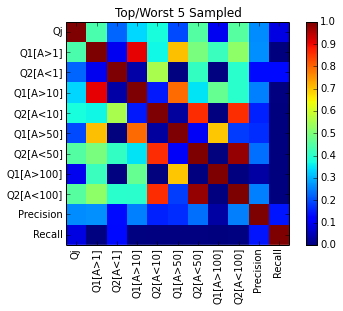

In [57]:
plt.title("Top/Worst 5 Sampled")
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()
plt.clim(0,1)

# Regression against  ground truth PR

In [58]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    print "---------------------------------------------"
    print "Regression x={0};y={1}".format(x_attr,y_attr)
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print 'Coefficients: ', regr.coef_
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.figure()
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

---------------------------------------------
Regression x=['Precision'];y=['Q1[A>100]']
Coefficients:  [[ 0.08290146]]
Mean squared error: 0.07
R^2: -0.02


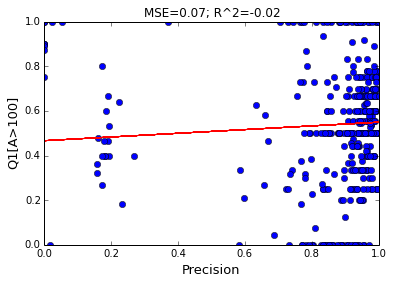

In [59]:
regression_results(["Precision"],["Q1[A>100]"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Q1[A>100]']
Coefficients:  [[-0.18567605]]
Mean squared error: 0.07
R^2: 0.01


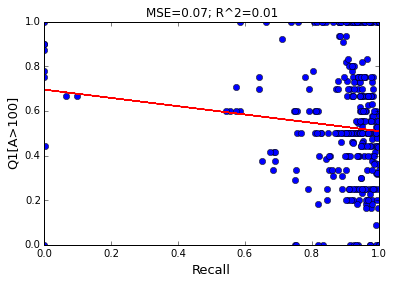

In [60]:
regression_results(["Recall"],["Q1[A>100]"],PLOT=True)

---------------------------------------------
Regression x=['Recall'];y=['Q2[A<100]']
Coefficients:  [[-0.17299235]]
Mean squared error: 0.03
R^2: 0.03


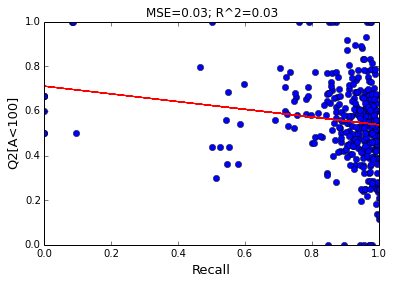

In [61]:
regression_results(["Recall"],["Q2[A<100]"],PLOT=True)

In [ ]:
regression_results(["Recall"],["Q2[A<100]"],PLOT=True)

---------------------------------------------
Regression x=['Q1[A>100]'];y=['Precision']
Coefficients:  [[ 0.01206326]]
Mean squared error: 0.04
R^2: 0.00
---------------------------------------------
Regression x=['Q1[A>100]'];y=['Recall']
Coefficients:  [[-0.05971437]]
Mean squared error: 0.02
R^2: 0.02
---------------------------------------------
Regression x=['Q2[A<10]'];y=['Precision']
Coefficients:  [[ 0.1699959]]
Mean squared error: 0.04
R^2: -0.03
---------------------------------------------
Regression x=['Q2[A<10]'];y=['Recall']
Coefficients:  [[-0.04926929]]
Mean squared error: 0.03
R^2: -0.02
---------------------------------------------
Regression x=['Qj'];y=['Precision']
Coefficients:  [[ 0.49366742]]
Mean squared error: 0.04
R^2: 0.08
---------------------------------------------
Regression x=['Qj'];y=['Recall']
Coefficients:  [[ 0.11871358]]
Mean squared error: 0.02
R^2: 0.01


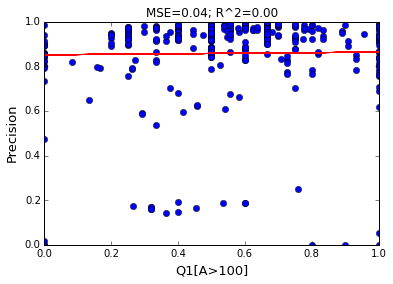

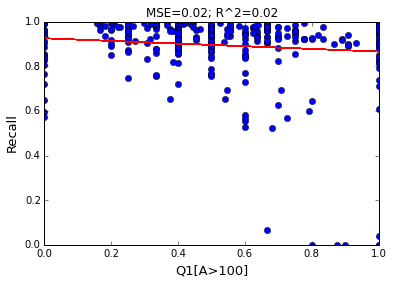

In [20]:
regression_results(["Q1[A>100]"], ["Precision"],PLOT=True)
regression_results(["Q1[A>100]"], ["Recall"],PLOT=True)
regression_results(["Q2[A<10]"], ["Precision"])
regression_results(["Q2[A<10]"], ["Recall"])
regression_results(["Qj"], ["Precision"])
regression_results(["Qj"], ["Recall"])

In [21]:
def plot_attr_histo(attr):
    data = df[attr]
    a = plt.hist(data,bins=50,normed=True)
    avg = np.mean(data)
    var = np.var(data)
    plt.title("Normalized {0} distribution [N={1}; bins=50]".format(attr,len(data)))
    plt.suptitle("mu={0:.3f};std={1:.3f}".format(avg,var))
    pdf_x = np.linspace(np.min(data),np.max(data),100)
    pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
    plt.plot(pdf_x,pdf_y,'--',color='red',linewidth=3)

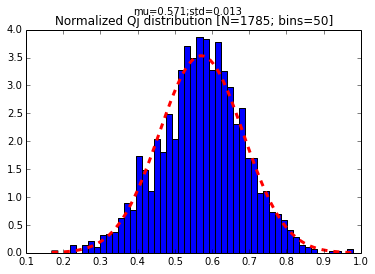

In [22]:
plot_attr_histo("Qj")

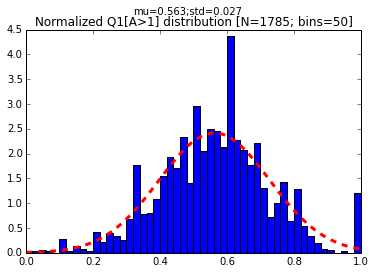

In [23]:
plot_attr_histo("Q1[A>1]")

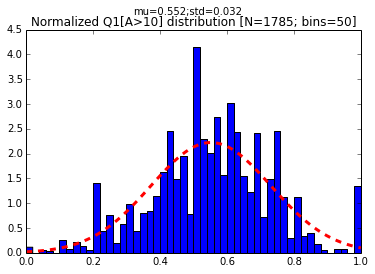

In [24]:
plot_attr_histo("Q1[A>10]")

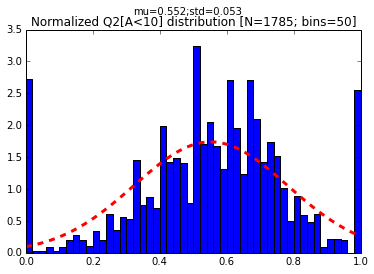

In [25]:
plot_attr_histo("Q2[A<10]")

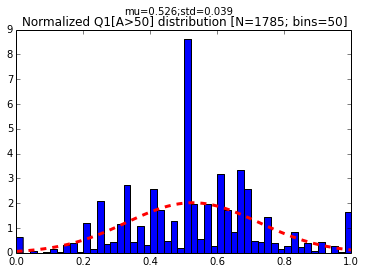

In [26]:
plot_attr_histo("Q1[A>50]")

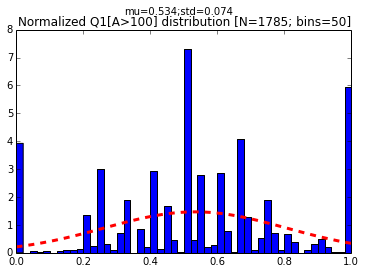

In [27]:
plot_attr_histo("Q1[A>100]")

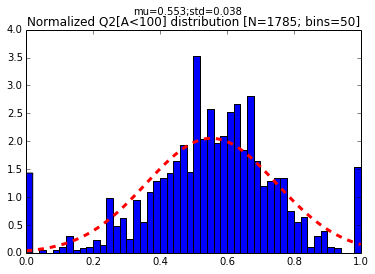

In [28]:
plot_attr_histo("Q2[A<100]")

# p(T')

In [29]:
df = pd.read_csv("all_tile_combo_metric_area.csv",index_col=0)

In [30]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [32]:
df = df.drop("Average gamma value",axis=1)
df = df.drop("Total gamma value",axis=1)

In [33]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Total Votes,Average Votes,Total area,Average area,pTprime,pTprime[Athres>1],pTprime[Athres>10],pTprime[Athres>50],pTprime[Athres>100],Precision,Recall
Total Votes,1.000000,0.449457,0.311417,0.057150,-0.146746,-0.089872,-0.099369,-0.074991,-0.024110,0.430250,0.572245
Average Votes,0.449457,1.000000,0.094788,0.140161,-0.005577,0.067666,-0.090259,-0.091308,0.051482,0.531914,0.235824
Total area,0.311417,0.094788,1.000000,0.793848,-0.054842,-0.033006,-0.037461,-0.028327,-0.013397,-0.134761,0.376177
Average area,0.057150,0.140161,0.793848,1.000000,-0.008301,0.013361,-0.026215,-0.025159,-0.010992,-0.119373,0.260925
pTprime,-0.146746,-0.005577,-0.054842,-0.008301,1.000000,0.451773,0.185657,0.079175,0.005553,-0.027574,-0.115613
pTprime[Athres>1],-0.089872,0.067666,-0.033006,0.013361,0.451773,1.000000,0.429075,0.238425,0.010530,0.042689,-0.064760
pTprime[Athres>10],-0.099369,-0.090259,-0.037461,-0.026215,0.185657,0.429075,1.000000,0.887582,0.006312,-0.046227,-0.069704
pTprime[Athres>50],-0.074991,-0.091308,-0.028327,-0.025159,0.079175,0.238425,0.887582,1.000000,0.006467,-0.046883,-0.052356
pTprime[Athres>100],-0.024110,0.051482,-0.013397,-0.010992,0.005553,0.010530,0.006312,0.006467,1.000000,0.023496,0.015036
Precision,0.430250,0.531914,-0.134761,-0.119373,-0.027574,0.042689,-0.046227,-0.046883,0.023496,1.000000,0.584517


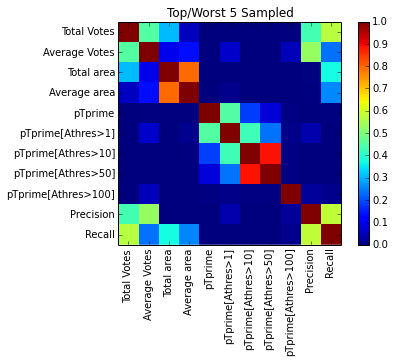

In [36]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()
plt.clim(0,1)
plt.title("Top/Worst 5 Sampled")

In [37]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    print "---------------------------------------------"
    print "Regression x={0};y={1}".format(x_attr,y_attr)
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print 'Coefficients: ', regr.coef_
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.figure()
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

---------------------------------------------
Regression x=['pTprime'];y=['Precision']
Coefficients:  [[-22589901.32092713]]
Mean squared error: 0.12
R^2: 0.00


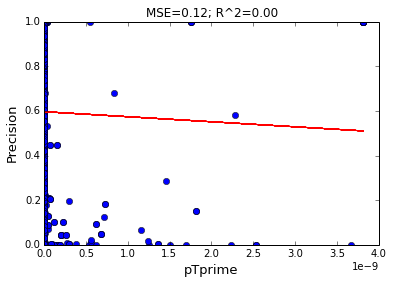

In [38]:
x_attr = ["pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['pTprime[Athres>100]'];y=['Precision']
Coefficients:  [[ 0.36614337]]
Mean squared error: 0.12
R^2: -0.00


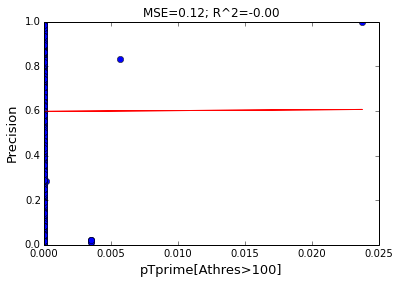

In [39]:
x_attr = ["pTprime[Athres>100]"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

In [45]:
x_attr = ["Precision"]
y_attr = ["Q1[A>1]"]
regression_results(x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['Precision'];y=['Q1[A>1]']


KeyError: "['Q1[A>1]'] not in index"

In [37]:
objid=18

In [39]:
def visualizeTilesSeparate(tiles,colorful=True):
    plt.figure()
    colors=cm.rainbow(np.linspace(0,1,len(tiles)))
    for t,i in zip(tiles,range(len(tiles))): 
#         plt.figure()
        if colorful: 
            c = colors[i]
        else: 
            c="lime"
        if type(t)==shapely.geometry.polygon.Polygon:
            plot_coords(t,color=c,reverse_xy=True,fill_color=c)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                
                if type(t)!=shapely.geometry.LineString:
                    plot_coords(region,color=c,reverse_xy=True,fill_color=c)
    #xylocs of the largest tile for estimating the obj size
    xlocs,ylocs = tiles[np.argmax([t.area for t in tiles])].exterior.coords.xy
    plt.ylim(np.min(ylocs)-50,np.max(ylocs)+50)

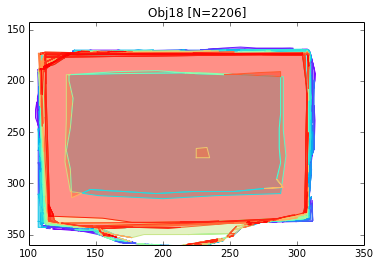

In [45]:
vtiles = pkl.load(open("vtiles{}.pkl".format(objid)))
visualizeTilesSeparate(vtiles)
plt.title("Obj{0} [N={1}]".format(objid,len(vtiles)))
plt.gca().invert_yaxis()

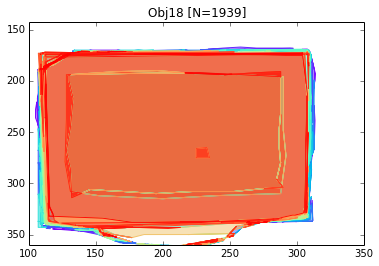

In [46]:
tiles = pkl.load(open("../output/tiles{}.pkl".format(objid)))
visualizeTilesSeparate(tiles)
plt.title("Obj{0} [N={1}]".format(objid,len(tiles)))
plt.gca().invert_yaxis()

In [47]:
def compute_tile_score(tiles,score_func):
    tiles = pkl.load(open("vtiles{}.pkl".format(objid),'r'))
    tile_score ={}
    for i,t in enumerate(tiles):
        tile_score[i]=score_func(t)
    return tile_score

In [59]:
vtiles = pkl.load(open("vtiles{}.pkl".format(objid)))

In [60]:
tile_area = compute_tile_score(vtiles,lambda x: x.area)

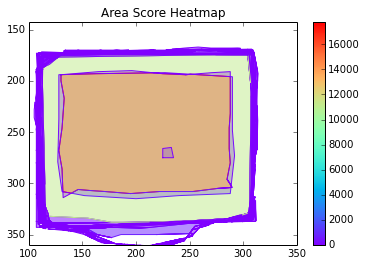

In [63]:
visualizeTilesScore(vtiles,tile_area,INT_Z=False)
plt.gca().invert_yaxis()
plt.title("Area Score Heatmap")

In [40]:
indMat  = pkl.load(open("../final_all_tiles/indMat18.pkl"))

Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True


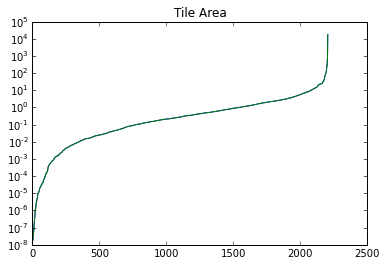

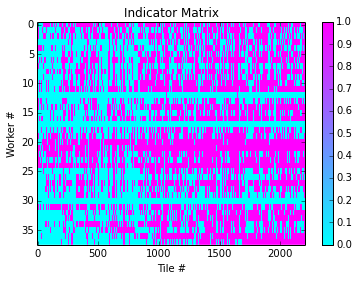

In [42]:
sanity_check(indMat,True)